In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

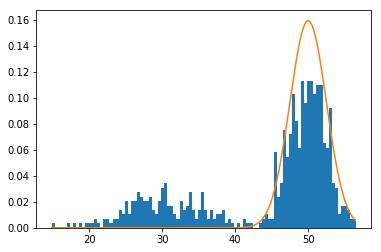

In [112]:
from scipy.stats import norm

y_1 = np.random.normal(30, 5, 200)
y_2 = np.random.normal(50, 2.5, 500)

xy_ = np.concatenate([y_1, y_2])
try:
    plt.hist(xy_, bins=100, normed=True)
except AttributeError:
    plt.hist(xy_, bins=100, density=True)

rv = norm(loc = 50., scale = 2.5)
x = np.arange(np.min(xy_), np.max(xy_), .1)
plt.plot(x, rv.pdf(x))

In [89]:
from math import pi, sqrt

#def gaussian1D(mu, sigma, x):
#    return 1.0/(math.sqrt(2*math.PI)*sigma)*tf.exp(-(0.5(mu-x)/sigma)**2)

@tf.custom_gradient
def gaussian1D(x, mu, sigma):
    x_centered = x-mu
    degree = (x_centered/sigma)**2
    y = 1.0/(sqrt(2*pi)*sigma)*tf.exp(-0.5*degree)
    def grad(dy):
        dydx = None
        dydmu = tf.reduce_sum(dy*y*x_centered)/sigma**2
        dydsigma = tf.reduce_sum(dy*y*(degree - 1))/sigma
        return dydx, dydmu, dydsigma
    return y, grad

"""
def gaussian2D(mu, sigma, x, sigma_is_root=False):
    if not sigma_is_root:
        sigma_det = tf.tf.matrix_determinant(sigma) #can use  matrix as bottom or upper trianglurar
        sigma_inv = tf.matrix_inverse(sigma)

        ux = mu-x
        uxT = tf.transpose(ux, perm=(0,1))
        return 1.0/(math.sqrt(2*math.PI)*sigma_det)*tf.exp(-0.5*ux@sigma_inv@uxT)
    else:
        sigma_det = tf.reduce_prod(diagonal_elements_of_sigma) #can use  matrix as bottom or upper trianglurar
        sigma_inv = tf.matrix_inverse(sigma)
        #M @ M.T = SIGMA
        #-> SIGMA^-1 = M^-1.T @ M^-1

        ux = mu-x
        uxT = tf.transpose(ux, perm=(1,2))
        return 1.0/(math.sqrt(2*math.PI)*sigma_det)*tf.exp(-0.5*ux@sigma_inv@uxT)


def gaussianND(mu, sigma, x):
    pass
    det_sigma = 0#use multiplication of main diagonal of Holeski matrix
    return 1.0/(math.sqrt(2*math.PI)*sigma)*tf.exp(-(0.5(mu-x)/sigma)**2)
"""

'\ndef gaussian2D(mu, sigma, x, sigma_is_root=False):\n    if not sigma_is_root:\n        sigma_det = tf.tf.matrix_determinant(sigma) #can use  matrix as bottom or upper trianglurar\n        sigma_inv = tf.matrix_inverse(sigma)\n\n        ux = mu-x\n        uxT = tf.transpose(ux, perm=(0,1))\n        return 1.0/(math.sqrt(2*math.PI)*sigma_det)*tf.exp(-0.5*ux@sigma_inv@uxT)\n    else:\n        sigma_det = tf.reduce_prod(diagonal_elements_of_sigma) #can use  matrix as bottom or upper trianglurar\n        sigma_inv = tf.matrix_inverse(sigma)\n        #M @ M.T = SIGMA\n        #-> SIGMA^-1 = M^-1.T @ M^-1\n\n        ux = mu-x\n        uxT = tf.transpose(ux, perm=(1,2))\n        return 1.0/(math.sqrt(2*math.PI)*sigma_det)*tf.exp(-0.5*ux@sigma_inv@uxT)\n\n\ndef gaussianND(mu, sigma, x):\n    pass\n    det_sigma = 0#use multiplication of main diagonal of Holeski matrix\n    return 1.0/(math.sqrt(2*math.PI)*sigma)*tf.exp(-(0.5(mu-x)/sigma)**2)\n'

In [58]:
ux, si

NameError: name 'ux' is not defined

In [126]:
tf.reset_default_graph()

from math import pi

K=1 #number of gaussians
D=1 #dim
mu = tf.Variable(30, dtype=tf.float32, name='mu') #mu = tf.Variable(np.random.normal(45.0, 0.4, [K, D]), dtype=tf.float32, name='mu')
sigma_L = tf.Variable(10, dtype=tf.float32, name='sigma_L') #sigma_L = tf.Variable(np.random.normal(-2, 2, [K, D*(D+1)//2]), dtype=tf.float32, name='sigma_L')
#sigma = tf.contrib.distributions.fill_triangular(sigma_L)
sigma = sigma_L**2#sigma = tf.matmul(sigma, sigma, transpose_b=True, name='sigma')

det = tf.matrix_determinant #can use  matrix as bottom or upper trianglurar
inv = tf.matrix_inverse
T = tf.transpose

#x = tf.placeholder(tf.float32, shape=(None, D))
#y = tf.placeholder(tf.float32, shape=(None, D))
w = tf.placeholder(tf.float32, shape=(None, D), name='w')


gaussians = []
for k in range(K):
    probs = gaussian1D(w, mu, sigma)
    gaussians.append(probs)
gaussians = tf.reduce_mean(gaussians, axis=1) #probs

#def softmax(x, k=100):
#    return tf.log(tf.reduce_sum(tf.exp(k*x), axis=0))/k

#probs = tf.reduce_mean(tf.nn.softmax(gaussians))
#probs = tf.reduce_mean(softmax(gaussians))

#loss_ce = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(gaussians, tf.ones_like(gaussians)))

loss = tf.reduce_sum(w*tf.log(gaussians/w))
lr = tf.placeholder(dtype=tf.float32, shape=[])
opt = tf.train.AdamOptimizer(lr).minimize(-loss, var_list=[mu, sigma_L])

#saver = tf.train.Saver()
#fw = tf.summary.FileWriter('C:/users/alkor/tf_logs/dist_layer', graph=tf.get_default_graph())

grads_vars = tf.train.GradientDescentOptimizer(lr).compute_gradients(loss)

In [114]:
w_batch

<tf.Tensor 'strided_slice:0' shape=(?, 1) dtype=float32>

loss -41591.589844, mu 30.750000, sigma 85.562492
loss -40915.957031, mu 31.498913, sigma 72.234619
loss -40188.066406, mu 32.245232, sigma 60.010670
loss -39400.480469, mu 32.986694, sigma 48.888649
loss -38545.640625, mu 33.720154, sigma 38.870777
loss -37618.070312, mu 34.441513, sigma 29.963928
loss -36621.105469, mu 35.145790, sigma 22.181229


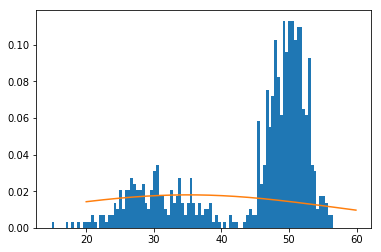

0.012027395
loss -35668.574219, mu 35.826492, sigma 15.560253
loss -34797.070312, mu 36.478863, sigma 10.215085
loss -34506.039062, mu 37.107468, sigma 6.786500
loss -35310.636719, mu 37.752701, sigma 6.011703
loss -35586.871094, mu 38.430149, sigma 6.640822
loss -34900.433594, mu 39.137684, sigma 8.084728
loss -34072.980469, mu 39.870609, sigma 9.923965


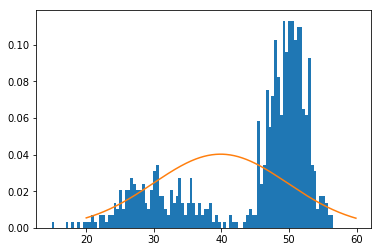

0.02137466
loss -32064.498047, mu 40.593052, sigma 11.652488
loss -32124.361328, mu 41.289173, sigma 12.977880
loss -32255.332031, mu 41.950371, sigma 13.752209
loss -32343.328125, mu 42.573292, sigma 13.937257
loss -32346.726562, mu 43.157871, sigma 13.565511
loss -32256.203125, mu 43.706367, sigma 12.712082
loss -32075.275391, mu 44.223373, sigma 11.475913


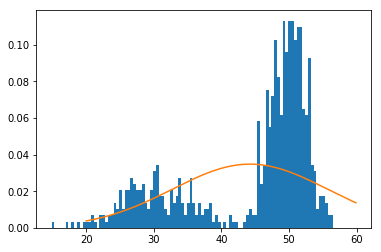

0.02401222
loss -33370.312500, mu 44.734249, sigma 9.933923
loss -32973.386719, mu 45.253910, sigma 8.209455
loss -32474.238281, mu 45.806557, sigma 6.413548
loss -31830.230469, mu 46.420776, sigma 4.646886
loss -30978.640625, mu 47.109177, sigma 3.024176
loss -29870.062500, mu 47.857422, sigma 1.659441
loss -28569.814453, mu 48.656036, sigma 0.662273


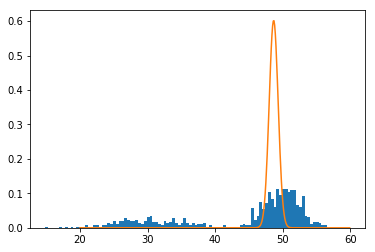

0.07725221
loss -28372.851562, mu 49.422138, sigma 0.289899
loss -27711.099609, mu 50.142826, sigma 0.104537
loss -26120.146484, mu 50.754154, sigma 0.021227
loss -39125.308594, mu 50.386166, sigma 0.357818
loss -26858.728516, mu 50.051804, sigma 1.018745
loss -27704.039062, mu 49.746761, sigma 1.909282
loss -28238.414062, mu 49.468517, sigma 2.954798


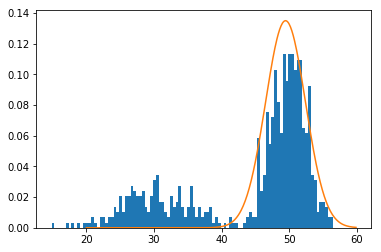

0.092976734
loss -28580.023438, mu 49.216034, sigma 4.092330
loss -29481.357422, mu 48.986774, sigma 5.273876
loss -30279.773438, mu 48.778477, sigma 6.463703
loss -30943.144531, mu 48.589115, sigma 7.635830
loss -31479.470703, mu 48.416870, sigma 8.771750
loss -31913.179688, mu 48.260120, sigma 9.858459
loss -32270.585938, mu 48.117420, sigma 10.887043


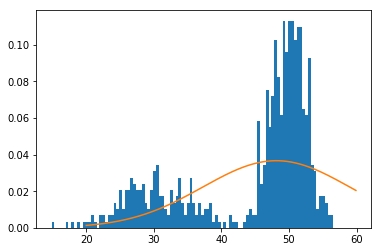

0.030402057
loss -32726.859375, mu 47.987522, sigma 11.852027
loss -32981.753906, mu 47.869259, sigma 12.749969
loss -33204.238281, mu 47.761578, sigma 13.579313
loss -33399.710938, mu 47.663528, sigma 14.339960
loss -33571.914062, mu 47.574249, sigma 15.032928
loss -33723.644531, mu 47.492954, sigma 15.660062
loss -33857.144531, mu 47.418930, sigma 16.223814


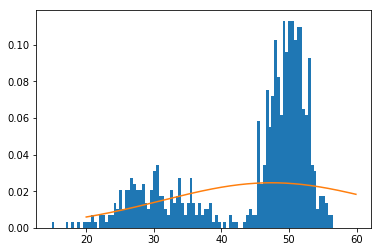

0.021789135
loss 0.000000, mu 47.351654, sigma 16.744823
loss 0.000000, mu 47.290520, sigma 17.225410
loss 0.000000, mu 47.234974, sigma 17.667961
loss 0.000000, mu 47.184513, sigma 18.074863
loss 0.000000, mu 47.138676, sigma 18.448488
loss 0.000000, mu 47.097046, sigma 18.791130
loss 0.000000, mu 47.059242, sigma 19.105015


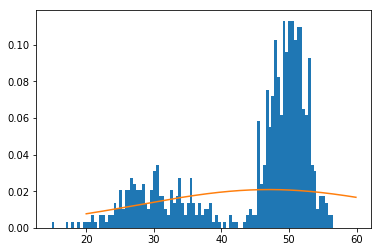

nan
loss 0.000000, mu 47.024918, sigma 19.392265
loss 0.000000, mu 46.993755, sigma 19.654909
loss 0.000000, mu 46.965469, sigma 19.894854
loss 0.000000, mu 46.939793, sigma 20.113901
loss 0.000000, mu 46.916492, sigma 20.313728
loss 0.000000, mu 46.895348, sigma 20.495914
loss 0.000000, mu 46.876163, sigma 20.661922


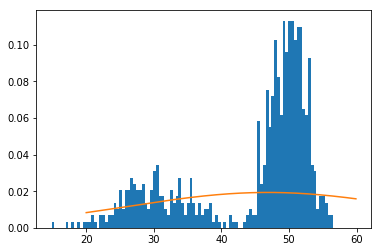

nan
loss 0.000000, mu 46.858757, sigma 20.813103
loss 0.000000, mu 46.842968, sigma 20.950724
loss 0.000000, mu 46.828648, sigma 21.075941
loss 0.000000, mu 46.815659, sigma 21.189827
loss 0.000000, mu 46.803883, sigma 21.293369
loss 0.000000, mu 46.793201, sigma 21.387476
loss 0.000000, mu 46.783520, sigma 21.472977


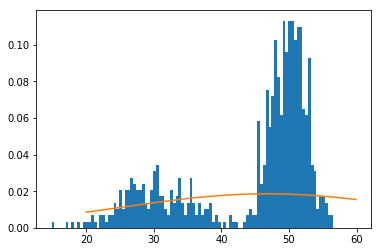

nan


In [127]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

t = np.arange(20, 60, 0.1)


np.random.shuffle(xy_)
bsz = 100
epochs = 10
for i in range(epochs):
    for j in range(xy_.shape[0]//bsz):
        w_batch = xy_[i*bsz: (i+1)*bsz]
        _, loss_, probs_, g_, sigma_, g_  = sess.run([opt, loss, probs, gaussians, sigma_L, grads_vars[1][0]],
                                            feed_dict = {w: np.expand_dims(w_batch, 1), lr: 0.75})
        mu_, sigma_ = sess.run([ mu, sigma])
        print('loss %f, mu %f, sigma %f' % (loss_, mu_,sigma_))
    plt.hist(xy_, bins=100, normed=True)

    rv = norm(loc = mu_, scale = sigma_)
    plt.plot(t, rv.pdf(t))
    plt.show()
    print(np.mean(probs_))
    #print(g_)


In [20]:
#now for 2 Gaussians

array([0.02881509, 0.03287185], dtype=float32)

In [130]:
tf.reset_default_graph()

from math import pi

K=2 #number of gaussians
D=1 #dim
mu = tf.Variable([60, 40], dtype=tf.float32, name='mu') #mu = tf.Variable(np.random.normal(45.0, 0.4, [K, D]), dtype=tf.float32, name='mu')
sigma_L = tf.Variable([10, 15], dtype=tf.float32, name='sigma_L') #sigma_L = tf.Variable(np.random.normal(-2, 2, [K, D*(D+1)//2]), dtype=tf.float32, name='sigma_L')
#sigma = tf.contrib.distributions.fill_triangular(sigma_L)
sigma = sigma_L**2#sigma = tf.matmul(sigma, sigma, transpose_b=True, name='sigma')

det = tf.matrix_determinant #can use  matrix as bottom or upper trianglurar
inv = tf.matrix_inverse
T = tf.transpose

#x = tf.placeholder(tf.float32, shape=(None, D))
#y = tf.placeholder(tf.float32, shape=(None, D))
w = tf.placeholder(tf.float32, shape=(None, D), name='w')


gaussians = []
for k in range(K):
    probs = gaussian1D(w, mu[k], sigma[k])
    gaussians.append(probs)
gaussians = tf.reduce_mean(gaussians, axis=1) #probs

#gauss = gaussian2D(mu, sigma, x)
#gaussian2D()

#def softmax(x, k=100):
#    return tf.log(tf.reduce_sum(tf.exp(k*x), axis=0))/k

#probs = tf.reduce_mean(tf.nn.softmax(gaussians))
#probs = tf.reduce_mean(softmax(gaussians))

#loss_ce = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(gaussians, tf.ones_like(gaussians)))

loss = tf.reduce_sum(w*tf.log(gaussians/w))
lr = tf.placeholder(dtype=tf.float32, shape=[])
opt = tf.train.AdamOptimizer(lr).minimize(-loss, var_list=[mu, sigma_L])

#saver = tf.train.Saver()
#fw = tf.summary.FileWriter('C:/users/alkor/tf_logs/dist_layer', graph=tf.get_default_graph())

grads_vars = tf.train.GradientDescentOptimizer(lr).compute_gradients(loss)

mu  [60. 40.] , sigma  [ 99.99999 225.     ]


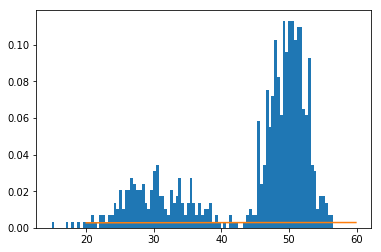

0.001771487
0.0018956775
0.0020352968
0.0021838173
0.0023539322
0.00254661
0.0027682602
0.0030154919
0.0033015816
0.0036312686
mu  [55.1075   44.453682] , sigma  [24.560913 99.30284 ]


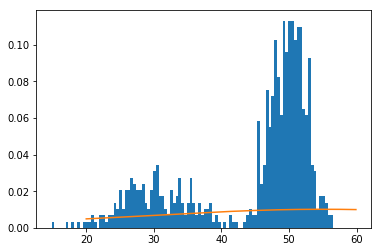

0.004006857
0.004465027
0.004908223
0.0056149717
0.0063737836
0.007206087
0.007804481
0.00988204
0.011557985
0.01432903
mu  [51.18278 46.15289] , sigma  [10.965661 22.284899]


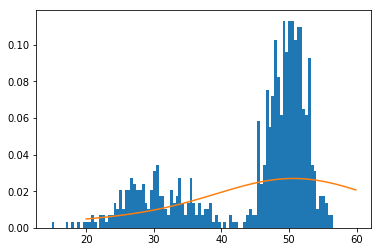

0.01723162
0.023055842
0.030492024
0.036325537
0.05176707
1.8422473e-12
0.0035854431
0.047560524
0.005449229
0.04408519
mu  [48.48927 46.6899 ] , sigma  [10.189726  9.041376]


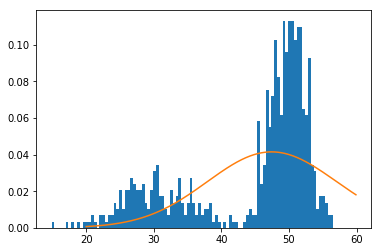

0.04151118
0.0329328
0.03376252
0.030679192
0.023477068
0.028618574
0.026624195
0.025324969
0.024284568
0.022574868
mu  [47.48931 45.66221] , sigma  [ 4.20995  16.553774]


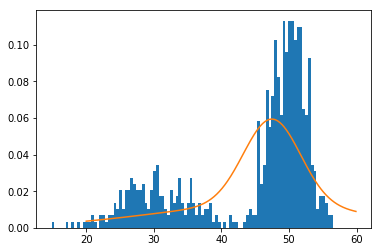

0.010989804
0.02359642
0.022736369
0.022283943
0.021816006
0.021412056
0.022135446
0.021120735
0.022640541
0.022239873
mu  [46.77821 45.42142] , sigma  [10.149619 17.284386]


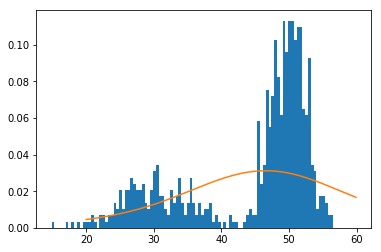

0.020693569
0.021936314
0.023067398
0.023271978
0.020662526
0.012712525
0.025131103
0.02523276
0.025233064
0.025263397
mu  [46.95547 45.51209] , sigma  [ 8.901488 14.657938]


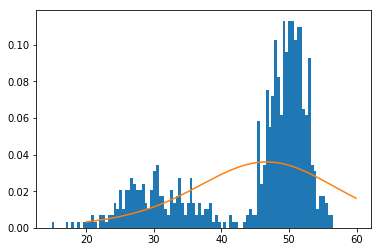

0.025972206
0.0222149
0.024125973
0.028649641
0.029884888
0.030437814
0.027833024
0.022953195
0.004514335
0.023568962
mu  [46.68603  45.622158] , sigma  [ 7.3972707 11.222854 ]


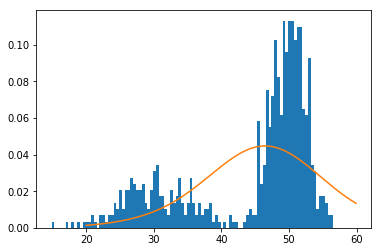

0.020550888
0.032326333
0.036970425
0.0065558897
0.0045953104
0.027708162
0.032056358
0.023087427
0.03837834
0.032721594
mu  [44.77763 45.21507] , sigma  [13.39366    9.7964735]


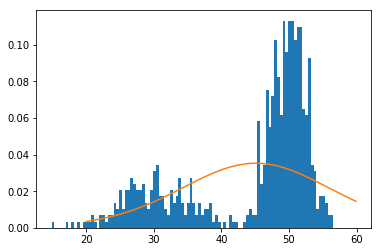

0.0346685
0.036352396
0.040389165
0.010229674
0.0060725957
0.033609044
0.024489958
0.0023054031
0.034002524
0.04209676
mu  [44.31179  45.348457] , sigma  [13.007411  9.111753]


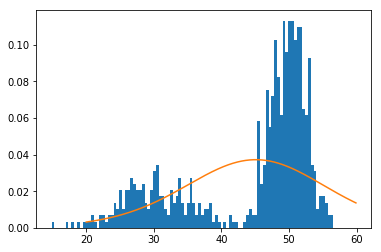

0.021323558
0.02332758
0.043274153
0.03559311
0.026849797
0.0056307805
0.005234462
0.008695459
0.014081336
0.032435786
mu  [43.682198 44.595913] , sigma  [10.981846 10.121494]


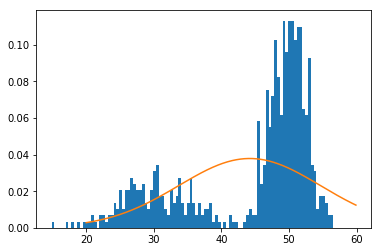

0.031713802
0.029992606
0.0058571408
0.036106408
0.02170189
0.03413401
0.03520512
0.027189534
0.030163817
0.02901041
mu  [44.10549  44.493584] , sigma  [ 9.224403 10.571121]


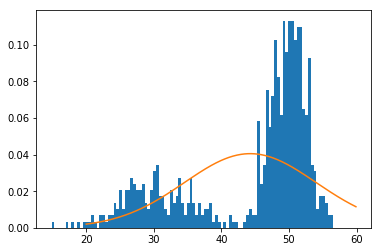

0.032043707
0.03645734
0.036939565
0.028546838
0.0058681527
0.04042688
0.0065993005
0.036948014
0.03900383
0.0063372874
mu  [45.48079  45.221855] , sigma  [8.366721 9.071639]


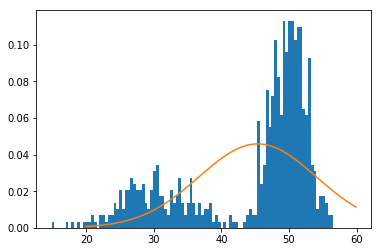

0.015758596
0.03361043
0.0039492934
0.032924198
0.027882356
0.037802193
0.03271125
0.040591735
0.03530568
0.041075353
mu  [45.737232 45.58391 ] , sigma  [10.557683  9.023485]


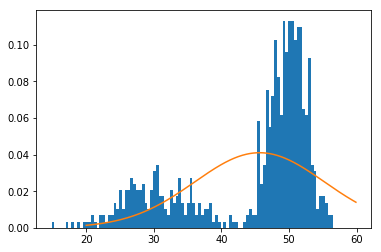

0.039724197
0.040898327
0.046415545
0.0033405125
0.04314216
0.00028249898
0.044057645
0.021997089
0.043855947
0.0002753604
mu  [45.777428 45.724857] , sigma  [9.518462 8.839693]


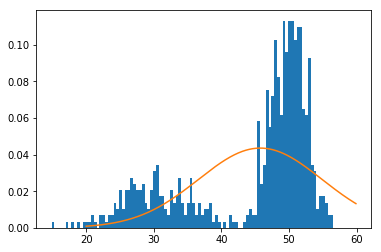

0.026451726
0.04340136
0.037981406
0.0002430722
0.018589359
0.034549266
0.026430884
0.031194184
0.0069687855
0.029299958
mu  [45.0976  45.09903] , sigma  [11.770993  11.5103855]


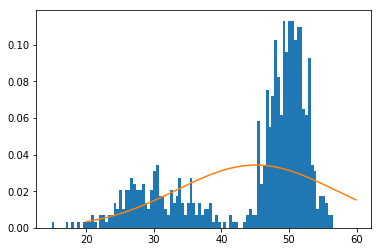

0.024123829
0.018805536
0.032782428
0.022643888
0.029051358
0.01169082
0.029017216
0.030648598
0.030700417
0.031256206
mu  [44.673435 44.69679 ] , sigma  [10.436689 11.281516]


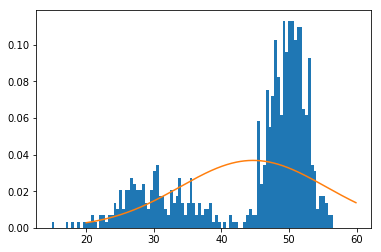

0.02025098
0.026414618
0.035087455
0.03515342
0.024616696
0.03192546
0.040580723
0.03615112
0.0360683
0.00980749
mu  [45.891396 45.476086] , sigma  [6.517598 8.244424]


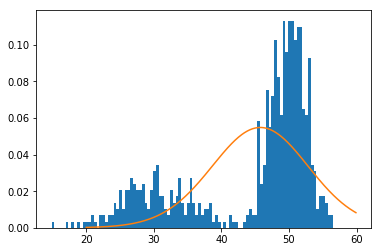

0.036708344
0.040390164
0.044663902
0.052334562
0.05644644
0.0014056681
0.058415473
0.0013381245
0.045639556
0.04387467
mu  [46.49387  46.044186] , sigma  [9.176109 7.218774]


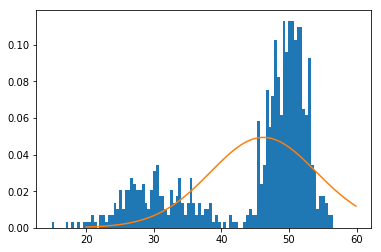

0.054515067
0.035747025
9.180821e-05
0.04947624
0.037723318
0.045568198
0.03321543
0.036445346
0.016370876
0.04340218
mu  [46.196926 46.328976] , sigma  [12.038307  9.009353]


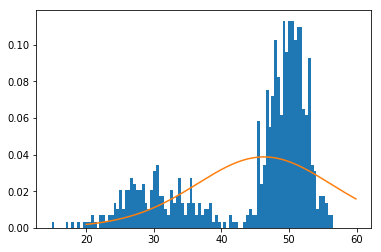

0.01649432
0.03770948
0.04316564
0.04002398
0.038277864
0.04207991
0.035167173
0.044622224
0.046961483
0.0011214007
mu  [46.58808  47.043903] , sigma  [7.736135 7.382467]


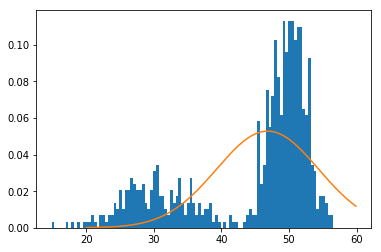

0.050529953
0.0010635434
0.0067353565
0.048217077
0.001307245
0.042902227
0.0358465
0.03938416
0.033095587
0.024762454
mu  [45.726864 46.301018] , sigma  [10.725287 10.705262]


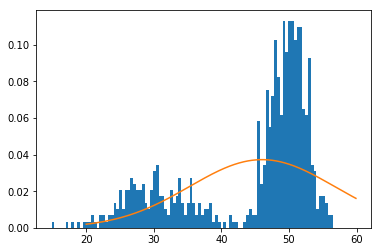

0.0017261807
0.036046878
0.019142257
0.028915724
0.030374803
0.007866383
0.032778203
0.033480823
0.006908813
0.032752227
mu  [45.39977  45.895054] , sigma  [11.3131   11.671083]


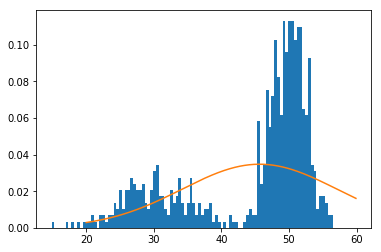

0.0016442203
0.031972475
0.030600155
0.033577498
0.0143624935
0.006388669
0.03448786
0.01925265
0.011395648
0.027652705
mu  [44.74045  45.213318] , sigma  [11.041012 11.477438]


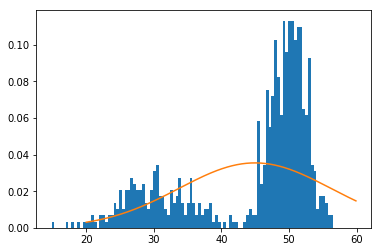

0.027824506
0.031185327
0.035201415
0.034358658
0.031518213
0.03859965
0.040215842
0.03125048
0.044277396
0.04684207
mu  [45.03916  45.285503] , sigma  [6.57806  7.977933]


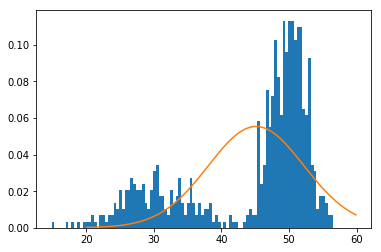

0.04930595
0.0040040305
0.0011870208
0.046393387
0.008105715
0.0061345715
0.04740592
0.031343367
0.026312372
0.03840836
mu  [43.5315  44.12646] , sigma  [12.639353  9.252736]


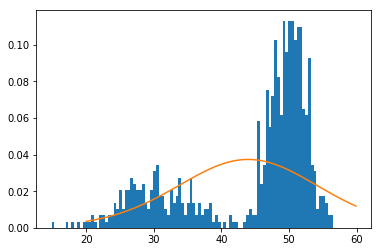

0.033680256
0.028592004
0.0068287184
0.03145205
0.023542076
0.032526445
0.031730782
0.038112044
0.03352726
0.035597894
mu  [43.221416 44.225822] , sigma  [12.635917  9.481251]


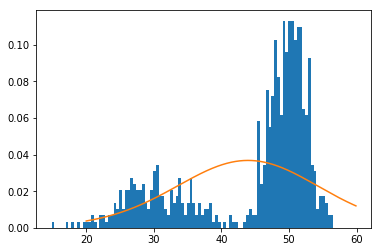

0.039169192
0.037391063
0.03859593
0.011004979
0.037518814
0.048270218
0.010086341
0.04909179
0.04709058
0.034686603
mu  [43.651104 44.75346 ] , sigma  [7.2982206 6.9282336]


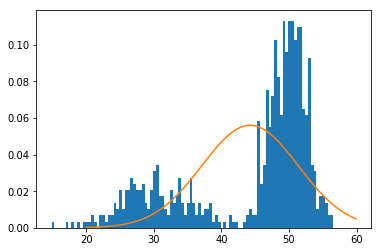

3.2117558e-05
0.014284761
0.0472095
0.009725724
0.03279351
0.042295568
0.013052139
0.03780277
0.02952645
0.028986331
mu  [43.045246 43.739166] , sigma  [ 9.385034 10.190019]


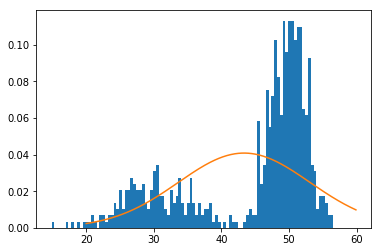

0.03315082
0.00470006
0.031847455
0.032278802
0.007259892
0.0291955
0.029200042
0.03015434
0.026401954
0.026952066
mu  [44.096138 44.226162] , sigma  [10.228175 10.380261]


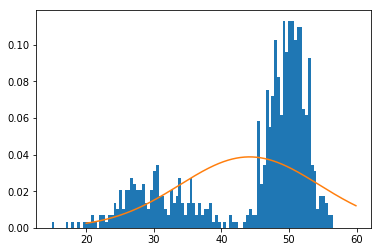

0.029576
0.013542663
0.036095314
0.03339949
0.006429864
0.021976007
0.037873507
0.026884606
0.0393907
0.035180815
mu  [45.11953  44.938328] , sigma  [9.061211 9.082015]


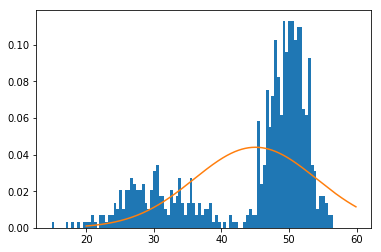

0.00791481
0.038363572
0.0116008185
0.027676338
0.04170758
0.0072668535
0.005783275
0.03272614
0.035873305
0.031393476
mu  [45.3401  45.13955] , sigma  [9.9454565 9.565005 ]


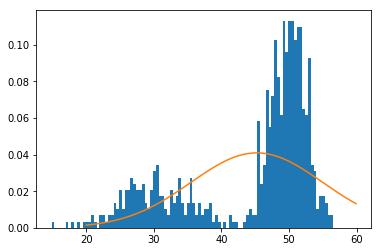

0.034876328
0.036437105
0.04118726
0.0301875
0.02664718
0.032681923
0.0022933988
0.04297152
0.04327859
0.04462648
mu  [46.215176 46.092113] , sigma  [8.104028 8.287581]


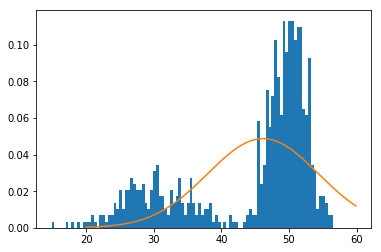

0.04742536
0.0053915717
0.04995654
0.04742978
0.05230586
0.0049278336
0.03891931
0.042797983
0.05389065
0.045041874
mu  [46.338936 46.347992] , sigma  [6.621892  6.7629967]


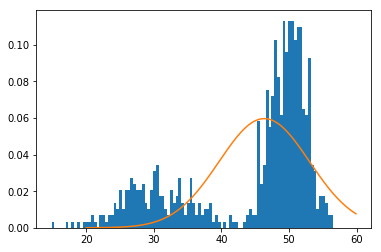

0.056722548
0.053870223
0.04424208
0.023098292
0.071442485
1.7967646e-05
7.8792276e-05
0.036956627
0.02879078
0.036289804
mu  [47.56542 47.494  ] , sigma  [15.530207 12.249591]


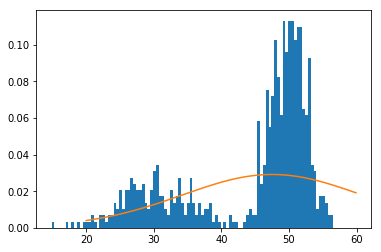

0.0321566
0.028571367
0.0094358185
0.01188778
0.023472361
0.009105156
0.022348236
0.021633033
0.020864973
0.01812689
mu  [47.55378 47.50647] , sigma  [25.971424 19.21512 ]


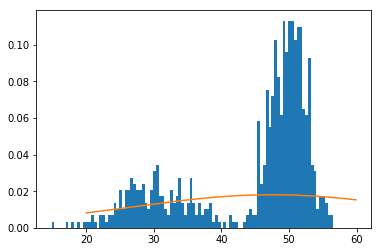

0.020757342
0.018107248
0.020330537
0.011107428
0.012394024
0.021187946
0.020935288
0.016596526
0.022303104
0.022411207
mu  [47.370796 47.20776 ] , sigma  [22.573914 16.954159]


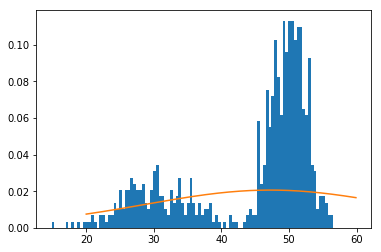

0.023367682
0.02294418
0.02442984
0.0072434708
0.027212214
0.028378358
0.028470615
0.029781237
0.032643273
0.034543138
mu  [47.32092  47.142838] , sigma  [13.480053 10.587548]


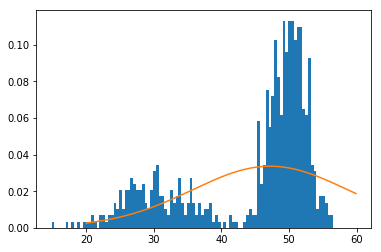

0.036574878
0.0405328
0.041828983
0.0065319445
0.05137223
0.04714364
0.029517457
0.041209348
0.059536546
0.003507153
mu  [47.66381  47.653637] , sigma  [5.6430273 5.562268 ]


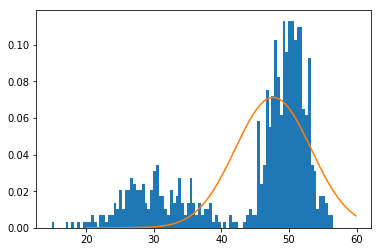

2.4271254e-05
0.05803281
0.0421671
0.045771748
0.043659776
0.0063722623
0.018348714
0.033090606
0.028827557
0.033925183
mu  [46.61984  46.824406] , sigma  [12.024627 11.977047]


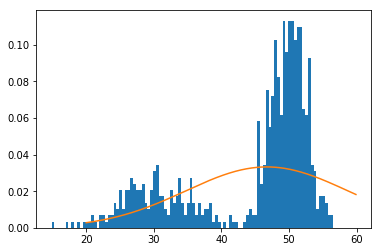

0.033100046
0.029555073
0.012403277
0.02913067
0.03297269
0.033665333
0.032342076
0.02624615
0.036741134
0.034794535
mu  [46.385128 46.607063] , sigma  [8.747339 9.894977]


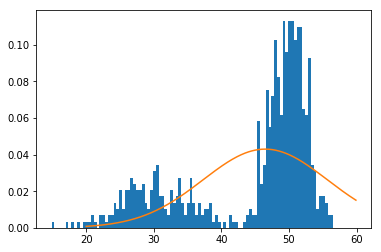

0.036574528
0.039782714
0.04097103
0.0060647656
0.049522948
0.04189626
0.037972193
0.012570842
0.046495076
0.012318229
mu  [46.897552 46.91306 ] , sigma  [6.4921784 6.423914 ]


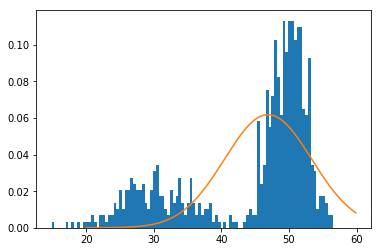

0.05244356
0.054393366
0.00048719047
0.023196924
0.037675615
0.047777858
0.03636435
0.044042934
0.04443984
0.0022366308
mu  [46.687725 46.605053] , sigma  [10.207397  8.914128]


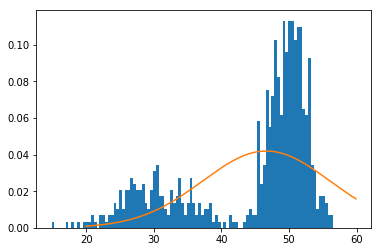

0.03494744
0.040265292
0.040680476
0.0014283484
0.041618515
0.033426423
0.006175668
0.029425245
0.03681307
0.009269206
mu  [46.66428 46.61153] , sigma  [10.464345 10.550274]


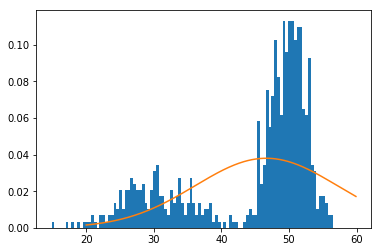

0.035789598
0.036450796
0.034923285
0.009077498
0.035875145
0.03195482
0.036361065
0.04091427
0.034068886
0.04467128
mu  [46.948284 46.85618 ] , sigma  [7.2188916 8.423749 ]


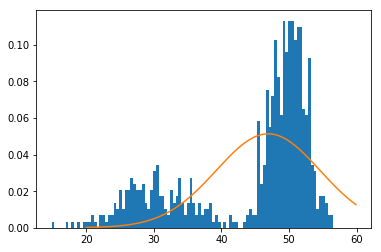

0.044595227
0.049061153
0.003068465
0.049204692
0.045036335
0.0589297
0.048343517
0.06684263
0.0714399
0.041899174
mu  [47.87549  47.768353] , sigma  [4.569184 4.526199]


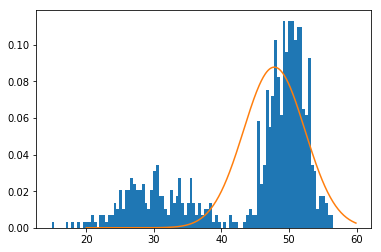

0.00012883471
0.07118539
0.066470005
0.010880371
0.057254467
0.034505747
0.052019704
0.047566254
0.0089783175
0.047675516
mu  [47.518597 47.40124 ] , sigma  [9.777486 8.530828]


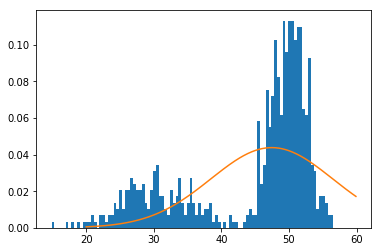

0.04668454
0.038491912
0.047003366
0.048088912
0.004664425
0.049612194
0.045219272
0.044265747
0.04295735
0.05232572
mu  [47.36657 47.25551] , sigma  [6.675121  6.7809443]


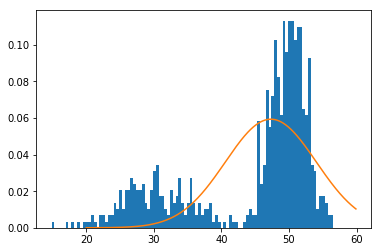

0.056831915
0.062986255
0.06850181
0.019096652
1.848753e-06
0.06390389
0.05363848
0.00019055052
0.041768815
0.025967097
mu  [47.505375 47.418266] , sigma  [15.807443 11.856118]


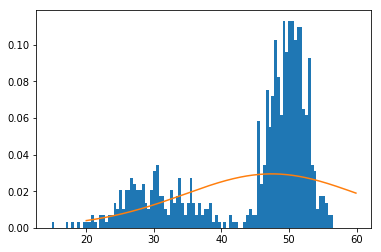

0.033647068
0.031116031
0.028574552
0.028156571
0.027355226
0.026220907
0.010437729
0.013040067
0.026098592
0.026028648
mu  [47.13344 47.0173 ] , sigma  [22.59287  15.230109]


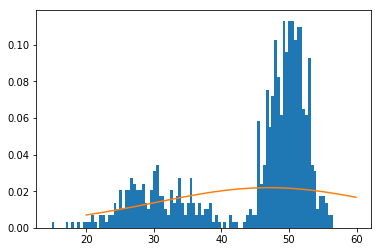

0.023899546
0.026490044
0.026927076
0.014504763
0.028398644
0.010288279
0.017930338
0.028735343
0.023786645
0.028726686
mu  [46.885983 46.63382 ] , sigma  [18.234243 11.914173]


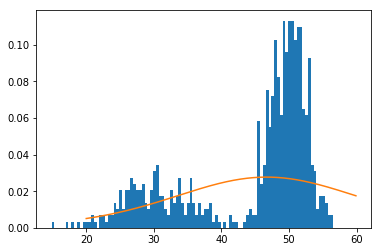

0.028386721
0.009485078
0.034830913
0.0035004003
0.013121831
0.032658305
0.0068579814
0.035225
0.011837809
0.03475333
mu  [46.53352  46.002098] , sigma  [12.713562 10.577831]


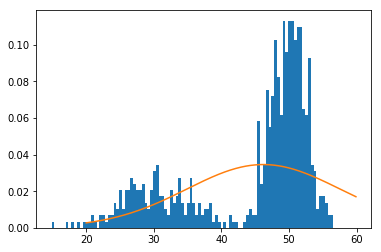

0.035289023
0.011864428
0.03815824
0.027668916
0.037487518
0.03570233
0.041101202
0.042367626
0.033073235
0.048790913
mu  [46.448475 45.82835 ] , sigma  [6.4898276 7.475398 ]


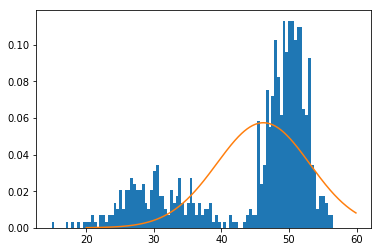

0.04578866
0.048246063
0.062652595
0.068792075
0.030553432
0.059030123
0.00022352526
0.038538244
0.04687179
0.0529806
mu  [45.550434 46.027637] , sigma  [11.090542  6.533215]


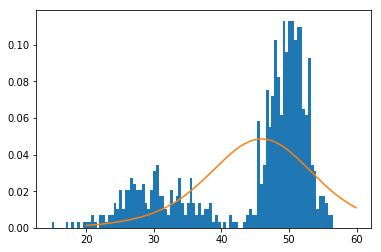

0.034887258
0.04385804
0.04154636
0.0028768524
0.048290007
0.008486213
0.042268116
0.03784329
0.038767386
0.03684271
mu  [44.971565 47.02301 ] , sigma  [21.80334  10.244322]


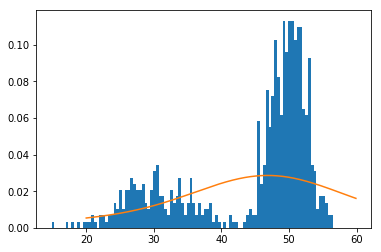

0.038387474
0.037253145
0.03651759
0.030749513
0.02340369
0.040943865
0.026577238
0.047781132
0.0013576362
0.045869444
mu  [44.906044 47.347183] , sigma  [18.781618  8.009812]


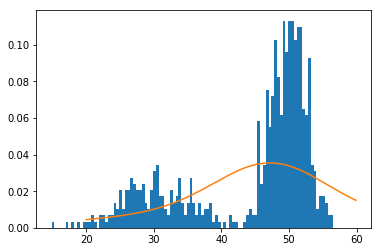

0.04942443
0.048362147
0.047988325
0.04080784
0.049324676
0.06144299
0.066561095
4.2754633e-05
0.06006883
0.01564358
mu  [45.116177 47.413258] , sigma  [11.523894   6.9357047]


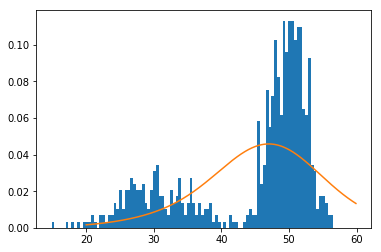

0.006352468
0.005288168
0.04438281
0.03662797
0.029965222
0.035670456
0.031586878
0.017524017
0.02968508
0.023398083
mu  [45.011135 45.66773 ] , sigma  [ 6.8243346 12.554668 ]


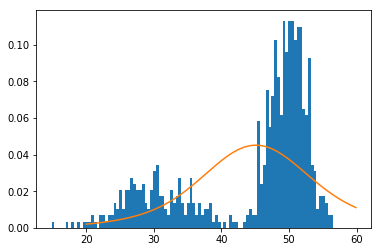

0.031427648
0.026745856
0.031235589
0.010773541
0.031365935
0.015890105
0.026840864
0.012385556
0.028459132
0.03186784
mu  [44.821636 44.940273] , sigma  [ 9.91566  11.000215]


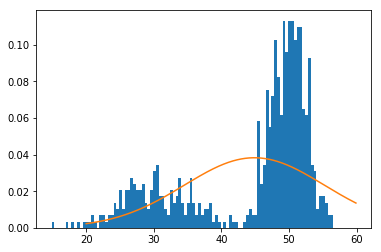

0.03426209
0.022390863
0.015552699
0.03933554
0.002316573
0.034889393
0.031689875
0.031190189
0.033224404
0.028776294
mu  [44.692352 44.705776] , sigma  [12.284543  8.892651]


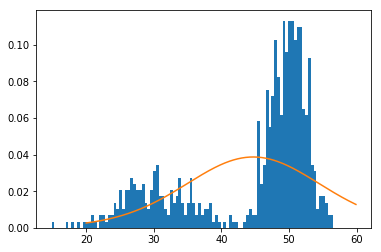

0.012058724
0.04157789
0.031182235
0.047039248
0.046056014
0.005694785
0.0326922
0.048280954
0.015507341
0.047550537
mu  [44.94113  45.164646] , sigma  [9.114013  7.3748574]


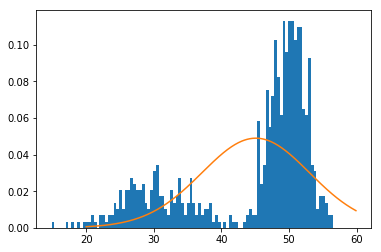

0.048188932
0.041656595
0.048716333
0.006233773
0.009092237
0.053852826
0.0348068
0.04249468
0.003030687
0.043078035
mu  [45.20795  45.449455] , sigma  [7.2619925 8.005628 ]


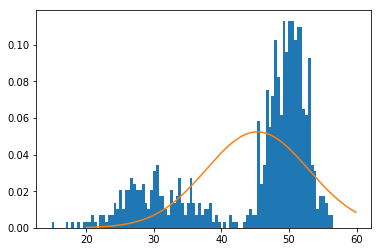

0.04982727
0.003801832
0.025282724
0.014322657
0.033768687
0.008137385
0.009061119
0.0333067
0.029154876
0.021474263
mu  [44.93275  45.120728] , sigma  [12.41713  12.316193]


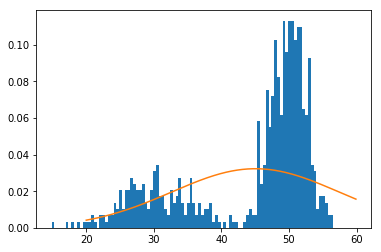

0.0048159184
0.03092844
0.020921258
0.016633652
0.01829555
0.026416404
0.026565943
0.023470977
0.028069474
0.012352602
mu  [44.23003  44.352673] , sigma  [13.870316 13.192326]


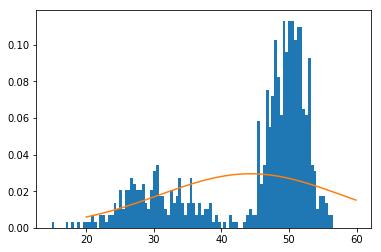

0.029769605
0.008329323
0.030718269
0.026950661
0.027213415
0.024678623
0.027909206
0.025347421
0.03723704
0.033011418
mu  [44.31187  44.435055] , sigma  [10.020616  9.622928]


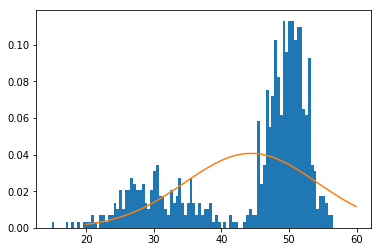

0.038786672
0.035289362
0.019857693
0.04506243
0.028439038
0.054171994
0.016215803
0.0062362594
0.017806293
0.034802936
mu  [44.855797 45.007065] , sigma  [6.9176784 6.971499 ]


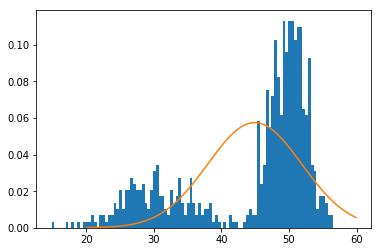

0.029749222
0.046156656
0.022954613
0.048039775
0.023344046
0.047463145
0.008778017
0.048953597
0.041117217
0.048637558
mu  [45.649063 45.709644] , sigma  [7.9582915 8.057894 ]


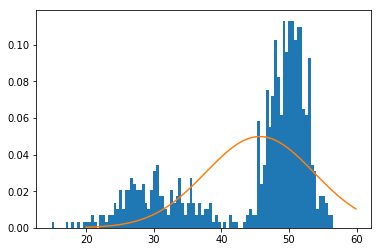

0.044937268
0.048425052
0.024931483
0.0055943816
0.035986345
0.03808786
0.034172695
0.05267019
0.037605457
0.05474188
mu  [47.081917 47.09612 ] , sigma  [7.032193  6.9778156]


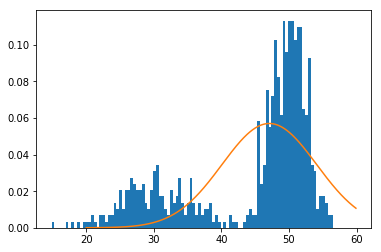

0.027150035
0.055201672
3.2390446e-05
0.054425407
0.012703243
0.047277603
0.039985072
0.040407654
0.037437618
0.041477673
mu  [48.269646 48.27281 ] , sigma  [9.312842 9.269376]


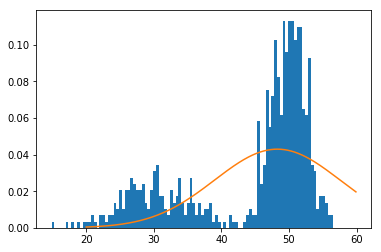

0.042874616
0.043527436
0.027596958
0.04764435
0.046877418
0.05222028
0.0434795
0.062292673
0.061689816
0.076096095
mu  [48.762226 48.756252] , sigma  [4.3321214 4.4828205]


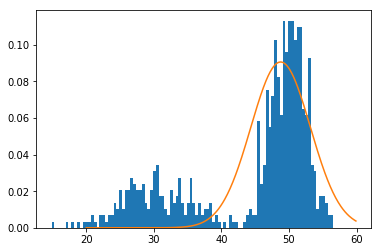

0.08263305
2.2676725e-09
0.00044018865
0.010936349
0.03266548
0.025748251
0.016025968
0.017592423
0.015252007
0.014327939
mu  [46.04392  46.067413] , sigma  [33.148277 29.942968]


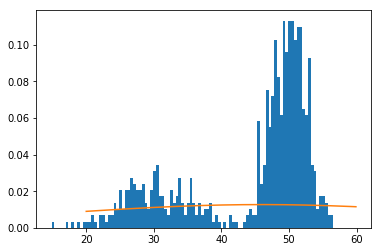

InvalidArgumentError: Incompatible shapes: [0,1] vs. [2,1]
	 [[Node: gradients/mul_6_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](gradients/mul_6_grad/Shape/_7, gradients/mul_6_grad/Shape_1)]]
	 [[Node: gradients_1/AddN_1/_53 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_617_gradients_1/AddN_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'gradients/mul_6_grad/BroadcastGradientArgs', defined at:
  File "/home/administrator/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/administrator/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/administrator/anaconda3/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/administrator/anaconda3/lib/python3.6/asyncio/base_events.py", line 1431, in _run_once
    handle._run()
  File "/home/administrator/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-130-ec00e1095d87>", line 40, in <module>
    opt = tf.train.AdamOptimizer(lr).minimize(-loss, var_list=[mu, sigma_L])
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 399, in minimize
    grad_loss=grad_loss)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 511, in compute_gradients
    colocate_gradients_with_ops=colocate_gradients_with_ops)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 532, in gradients
    gate_gradients, aggregation_method, stop_gradients)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 701, in _GradientsHelper
    lambda: grad_fn(op, *out_grads))
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 396, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 701, in <lambda>
    lambda: grad_fn(op, *out_grads))
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py", line 876, in _MulGrad
    rx, ry = gen_array_ops.broadcast_gradient_args(sx, sy)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 674, in broadcast_gradient_args
    "BroadcastGradientArgs", s0=s0, s1=s1, name=name)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 'mul_6', defined at:
  File "/home/administrator/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 25 identical lines from previous traceback]
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-130-ec00e1095d87>", line 38, in <module>
    loss = tf.reduce_sum(w*tf.log(gaussians/w))
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 847, in binary_op_wrapper
    return func(x, y, name=name)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 1091, in _mul_dispatch
    return gen_math_ops.mul(x, y, name=name)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4759, in mul
    "Mul", x=x, y=y, name=name)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/home/administrator/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [0,1] vs. [2,1]
	 [[Node: gradients/mul_6_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](gradients/mul_6_grad/Shape/_7, gradients/mul_6_grad/Shape_1)]]
	 [[Node: gradients_1/AddN_1/_53 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_617_gradients_1/AddN_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [133]:
from IPython.display import clear_output

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

t = np.arange(20, 60, 0.1)

for i in range(1000):
    if i % 10 == 0:
        mu_, sigma_ = sess.run([mu, sigma])
        print('mu ', mu_, ', sigma ', sigma_)
        #clear_output()
        plt.hist(xy_, bins=100, normed=True)

        rv1 = norm(loc = mu_[0], scale = sigma_[0])
        rv2 = norm(loc = mu_[1], scale = sigma_[1])
        plt.plot(t, 0.5*(rv1.pdf(t) +  rv2.pdf(t)))
        plt.show()
    
    _, probs_, g_, sigma_, g_  = sess.run([opt,probs, gaussians, sigma_L, grads_vars],
                                            feed_dict = {w: np.expand_dims(xy_[i:i+1], 1), lr: 0.5})

    print(np.mean(probs_))
    #print(g_)


In [84]:
''

''